<a href="https://colab.research.google.com/github/paulgureghian/Google_Colab_Notebooks/blob/master/Visualize_a_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Created by Paul A. Gureghian on 12/10/18.**

**I will define a CNN model with a convolutional** 

**and a maxpooling layer,**

**and visualize their outputs.**

In [1]:
### Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
### Install PyTorch
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision

In [0]:
### Import packages
import torch
import torch.nn as nn
import torch.nn.functional as F

import PIL 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

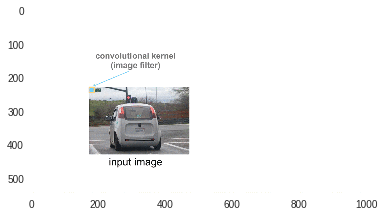

In [4]:
### Convolutional layer image
conv_layer = mpimg.imread("/content/drive/My Drive/Images/conv_layer.gif") 
plt.imshow(conv_layer)
plt.grid(False)

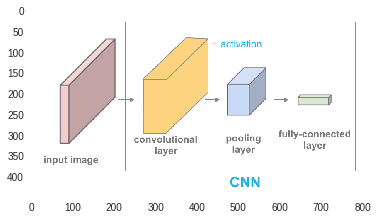

In [5]:
### All CNN layers image
cnn_all_layers = mpimg.imread("/content/drive/My Drive/Images/CNN_all_layers.png") 
plt.imshow(cnn_all_layers)
plt.grid(False)

# Convolutional Layer
# Maxpooling layer

In this notebook, I visualize four filtered outputs (a.k.a. activation maps) of a convolutional layer. and the output of a maxpooling layer.

In this example, I am defining four filters that are applied to an input image by initializing the **weights** of a convolutional layer. 



### Import the image

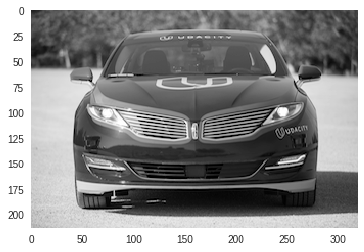

In [6]:
### Set file path to image 
udacity_sdc = ("/content/drive/My Drive/Images/udacity_sdc.png") 

### Load color image 
bgr_img = cv2.imread(udacity_sdc)

### Convert to grayscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

### Normalize, rescale entries to lie in [0,1]
gray_img = gray_img.astype("float32")/255

### Plot image
plt.imshow(gray_img, cmap='gray')
plt.grid(False)
plt.show()

### Define and visualize the filters

In [7]:
### Define and visualize the filters
filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])

print('Filter shape: ', filter_vals.shape)

Filter shape:  (4, 4)


In [8]:
### Defining four different filters, 
### All of which are linear combinations of the `filter_vals` defined above

### Define four filters
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

### Print out the values of filter 1
print('Filter 1: \n\n', filter_1)
print('')
print('Filter 2: \n\n', filter_2)
print('')
print('Filter 3: \n\n', filter_3)
print('')
print('Filter 4: \n\n', filter_4) 

Filter 1: 

 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]

Filter 2: 

 [[ 1  1 -1 -1]
 [ 1  1 -1 -1]
 [ 1  1 -1 -1]
 [ 1  1 -1 -1]]

Filter 3: 

 [[-1 -1 -1 -1]
 [-1 -1 -1 -1]
 [ 1  1  1  1]
 [ 1  1  1  1]]

Filter 4: 

 [[ 1  1  1  1]
 [ 1  1  1  1]
 [-1 -1 -1 -1]
 [-1 -1 -1 -1]]


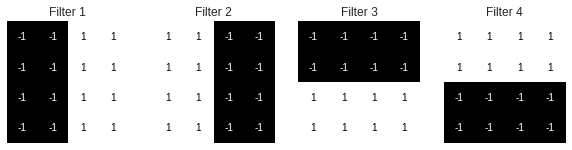

In [9]:
### Visualize all four filters
fig = plt.figure(figsize=(10, 5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if filters[i][x][y]<0 else 'black')

**Define a Convolutional layer.** 
**Define a Maxpooling layer.**

**For my convolutional neural network, I'll start by defining :**
**Convolutional layer.**
**Maxpooling layer.**

**I will initialize a single convolutional layer so that it contains all my created filters.** 

**I will also initialize a maxpooling layer to create my desired input size.**  

**Below, I define the structure of a class called `Net` that has  convolutional and maxpooling layers that can contain four 4x4 grayscale filters.**

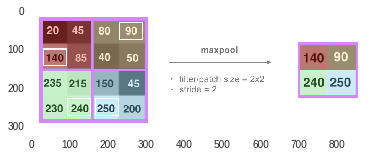

In [10]:
### Maxpooling layer image
maxpooling_layer = mpimg.imread("/content/drive/My Drive/Images/maxpooling_ex.png") 
plt.imshow(maxpooling_layer)
plt.grid(False)

In [11]:
### Define a convolutional layer with four filters
### Define a maxpooling layer with a 2x2 kernel
class Net(nn.Module):
    
    def __init__(self, weight):
        super(Net, self).__init__()
        ### Initializes the weights of the convolutional layer to be the weights of the 4 defined filters
        k_height, k_width = weight.shape[2:]
        
        ### Convolutional layers with 4 grayscale filters
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)

        ### Maxpooling layer with a 2x2 kernel
        self.pool = nn.MaxPool2d(2, 2) 
        
    def forward(self, x):
        ### Calculates the output of a convolutional layer
        ### Pre- and post-activation
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        
        ### Apply pooling layer
        pooled_x = self.pool(activated_x)
        
        ### Returns all layers
        return conv_x, activated_x, pooled_x
    
### Instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

### Print out the layers in the network
print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


### Visualize the output of each filter

First, we'll define a helper function, `viz_layer` that takes in a specific layer and number of filters (optional argument), and displays the output of that layer once an image has been passed through.

In [0]:
### Helper function for visualizing the output of a given layer
### Default number of filters is 4
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        ### Grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))
        ax.grid(False)

Let's look at the output of a convolutional layer, before and after a ReLu activation function is applied.

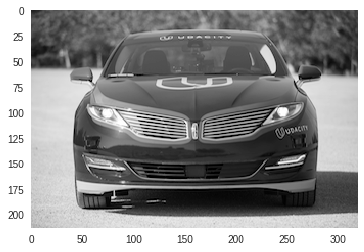

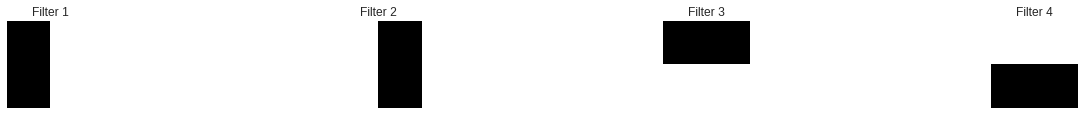

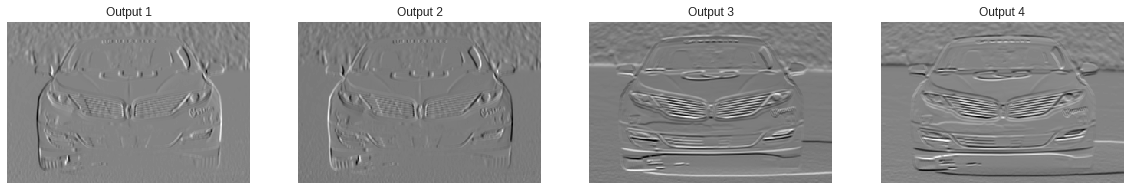

In [16]:
### Plot original image
plt.imshow(gray_img, cmap='gray')
plt.grid(False)

### Visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))   

### Convert the image into an input Tensor
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

### Get the convolutional layer (pre and post activation)
conv_layer, activated_layer, pooled_layer = model(gray_img_tensor)

### Visualize the output of the conv layer
viz_layer(conv_layer)

#### ReLu activation

In this model, I used an activation function that scales the output of the convolutional layer. I chose a ReLu function to do this, and this function simply turns all negative pixel values in 0's (black). See the equation pictured below for input pixel values, `x`. 



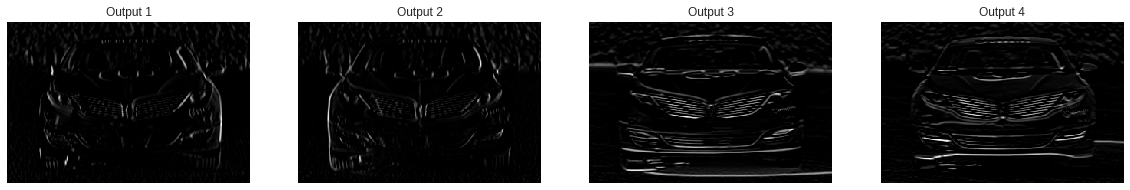

In [18]:
### Output of the activated layer
viz_layer(activated_layer) 

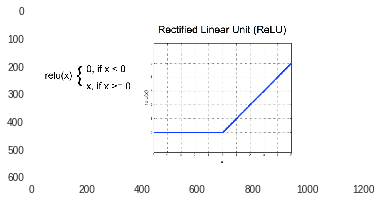

In [14]:
### Read in the image
relu_ex = mpimg.imread("/content/drive/My Drive/Images/relu_ex.png") 
plt.imshow(relu_ex)
plt.grid(False)

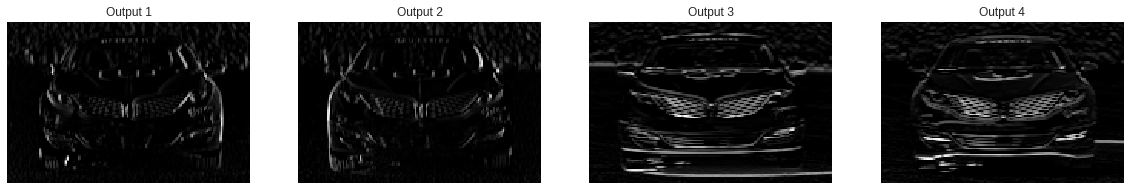

In [15]:
### Visualize the output of the pooling layer
viz_layer(pooled_layer)